In [11]:
from datasets import load_titanic, balance_classes
from tools import model_performance, confusion_matrix
from sklearn.metrics import plot_roc_curve
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'target'],
      dtype='object')

In [3]:
train_X = df_train.drop(['name', 'target', 'ticket','cabin'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['name', 'target', 'ticket','cabin'], axis=1)
test_y = df_test['target']

In [4]:
train_X.shape

(891, 7)

In [5]:
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

In [6]:
poly = PolynomialFeatures(2)
train_X = poly.fit_transform(train_X)[:,1:]
test_X = poly.fit_transform(test_X)[:,1:]
train_X.shape

(891, 65)

In [7]:
# kvuli konvergenci
scaler = StandardScaler().fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

(891, 65)

In [8]:
model = LogisticRegression(max_iter=150)
model = model.fit(train_X, train_y)

In [9]:
# Lepsi train score, ale pokles v test score
model_performance(model, train_X, train_y, test_X, test_y)

Train score
0.8361391694725028
Test score
0.8827751196172249


In [10]:
confusion_matrix(model.predict(train_X), train_y, model.predict(test_X), test_y)

Train
TN: 513, TP: 232, FN: 110, FP: 36
Test
TN: 248, TP: 121, FN: 31, FP: 18


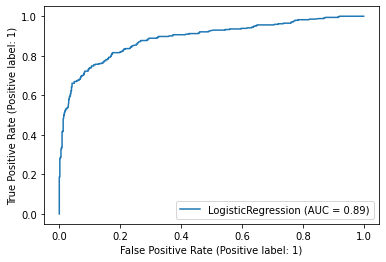

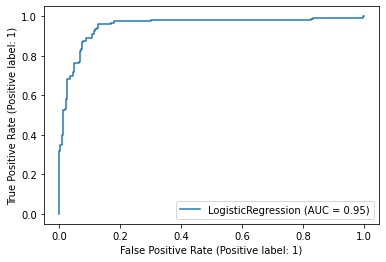

In [16]:
plot_roc_curve(model, train_X, train_y)
plot_roc_curve(model, test_X, test_y)